In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import ast
import time
from datetime import timedelta
from datetime import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df= pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/PolitikiProstasiaFinalFixed07042021.tsv", sep='\t')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,title,date,body,url
0,0,0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΣύμφωνα με το Έκτακτο ...",https://www.civilprotection.gr/el/ishyres-vroh...
1,1,1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021\nΟλοκληρώθηκε η επίσκεψ...",https://www.civilprotection.gr/el/simantika-th...
2,2,2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επ...",https://www.civilprotection.gr/el/simantika-th...
3,3,3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021\nΠραγματοποιήθηκε σήμερ...",https://www.civilprotection.gr/el/simantika-th...
4,4,4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021\n \nΜπορούμε να σβήσουμ...",https://www.civilprotection.gr/el/simantika-th...
...,...,...,...,...,...,...
544,544,544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaN,"\n/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020\n\n...",https://www.civilprotection.gr/el/simantika-th...
545,545,545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaN,"\nΑθήνα, 18 Φεβρουαρίου 2020\n Ο Γενικός Γρ...",https://www.civilprotection.gr/el/simantika-th...
546,546,546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaN,"\nΑθήνα, 24 Φεβρουαρίου 2020\n Σήμερα, Δευτ...",https://www.civilprotection.gr/el/emfasi-stin-...
547,547,547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaN,"\nΑθήνα, 16 Φεβρουαρίου 2020\n Ο Γενικός Γρα...",https://www.civilprotection.gr/el/simantika-th...


In [5]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis='columns', inplace=True)

In [6]:
df

,title,date,body,url
0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΣύμφωνα με το Έκτακτο ...",https://www.civilprotection.gr/el/ishyres-vroh...
1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021\nΟλοκληρώθηκε η επίσκεψ...",https://www.civilprotection.gr/el/simantika-th...
2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επ...",https://www.civilprotection.gr/el/simantika-th...
3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021\nΠραγματοποιήθηκε σήμερ...",https://www.civilprotection.gr/el/simantika-th...
4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021\n \nΜπορούμε να σβήσουμ...",https://www.civilprotection.gr/el/simantika-th...
...,...,...,...,...
544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaN,"\n/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020\n\n...",https://www.civilprotection.gr/el/simantika-th...
545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaN,"\nΑθήνα, 18 Φεβρουαρίου 2020\n Ο Γενικός Γρ...",https://www.civilprotection.gr/el/simantika-th...
546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaN,"\nΑθήνα, 24 Φεβρουαρίου 2020\n Σήμερα, Δευτ...",https://www.civilprotection.gr/el/emfasi-stin-...
547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaN,"\nΑθήνα, 16 Φεβρουαρίου 2020\n Ο Γενικός Γρα...",https://www.civilprotection.gr/el/simantika-th...


In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [8]:
df

,title,date,body,url
0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΣύμφωνα με το Έκτακτο ...",https://www.civilprotection.gr/el/ishyres-vroh...
1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021\nΟλοκληρώθηκε η επίσκεψ...",https://www.civilprotection.gr/el/simantika-th...
2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επ...",https://www.civilprotection.gr/el/simantika-th...
3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021\nΠραγματοποιήθηκε σήμερ...",https://www.civilprotection.gr/el/simantika-th...
4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021\n \nΜπορούμε να σβήσουμ...",https://www.civilprotection.gr/el/simantika-th...
...,...,...,...,...
544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaT,"\n/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020\n\n...",https://www.civilprotection.gr/el/simantika-th...
545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaT,"\nΑθήνα, 18 Φεβρουαρίου 2020\n Ο Γενικός Γρ...",https://www.civilprotection.gr/el/simantika-th...
546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaT,"\nΑθήνα, 24 Φεβρουαρίου 2020\n Σήμερα, Δευτ...",https://www.civilprotection.gr/el/emfasi-stin-...
547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaT,"\nΑθήνα, 16 Φεβρουαρίου 2020\n Ο Γενικός Γρα...",https://www.civilprotection.gr/el/simantika-th...


In [9]:
#df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [10]:
df.dtypes

title            object
date     datetime64[ns]
body             object
url              object
dtype: object

In [11]:
df['date'].isnull().sum()

131

In [12]:
df.isnull().sum()

title      0
date     131
body       0
url        0
dtype: int64

In [13]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [14]:
df

,title,date,body,url,year,month,day
0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΣύμφωνα με το Έκτακτο ...",https://www.civilprotection.gr/el/ishyres-vroh...,2021.0,6.0,11.0
1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021\nΟλοκληρώθηκε η επίσκεψ...",https://www.civilprotection.gr/el/simantika-th...,2021.0,6.0,12.0
2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επ...",https://www.civilprotection.gr/el/simantika-th...,2021.0,6.0,11.0
3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021\nΠραγματοποιήθηκε σήμερ...",https://www.civilprotection.gr/el/simantika-th...,2021.0,6.0,15.0
4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021\n \nΜπορούμε να σβήσουμ...",https://www.civilprotection.gr/el/simantika-th...,2021.0,6.0,11.0
...,...,...,...,...,...,...,...
544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaT,"\n/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020\n\n...",https://www.civilprotection.gr/el/simantika-th...,NaN,NaN,NaN
545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaT,"\nΑθήνα, 18 Φεβρουαρίου 2020\n Ο Γενικός Γρ...",https://www.civilprotection.gr/el/simantika-th...,NaN,NaN,NaN
546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaT,"\nΑθήνα, 24 Φεβρουαρίου 2020\n Σήμερα, Δευτ...",https://www.civilprotection.gr/el/emfasi-stin-...,NaN,NaN,NaN
547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaT,"\nΑθήνα, 16 Φεβρουαρίου 2020\n Ο Γενικός Γρα...",https://www.civilprotection.gr/el/simantika-th...,NaN,NaN,NaN


In [15]:
#df[df['date'].notna()]

In [16]:
df['year'] = df['year'].fillna(0.0).astype(int)
df['month'] = df['month'].fillna(0.0).astype(int)
df['day'] = df['day'].fillna(0.0).astype(int)

In [17]:
df.dtypes

title            object
date     datetime64[ns]
body             object
url              object
year              int64
month             int64
day               int64
dtype: object

In [18]:
df

,title,date,body,url,year,month,day
0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΣύμφωνα με το Έκτακτο ...",https://www.civilprotection.gr/el/ishyres-vroh...,2021,6,11
1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021\nΟλοκληρώθηκε η επίσκεψ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,12
2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,11
3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021\nΠραγματοποιήθηκε σήμερ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,15
4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021\n \nΜπορούμε να σβήσουμ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,11
...,...,...,...,...,...,...,...
544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaT,"\n/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020\n\n...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaT,"\nΑθήνα, 18 Φεβρουαρίου 2020\n Ο Γενικός Γρ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaT,"\nΑθήνα, 24 Φεβρουαρίου 2020\n Σήμερα, Δευτ...",https://www.civilprotection.gr/el/emfasi-stin-...,0,0,0
547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaT,"\nΑθήνα, 16 Φεβρουαρίου 2020\n Ο Γενικός Γρα...",https://www.civilprotection.gr/el/simantika-th...,0,0,0


In [19]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/PolitikiProstasiaFinalClean07062021.tsv", sep='\t')

In [20]:
df['body'][2]

'Αθήνα, 11 Ιουνίου 2021\nΞεκινά τη Δευτέρα η Επιχείρηση Δρυάδες υπό την απόλυτη ευθύνη της Πολιτικής Προστασίας στις 18 περιοχές της Αττικής με ιδιαίτερα χαρακτηριστικά επικινδυνότητας για εκδήλωση πυρκαγιάς, οι οποίες προσδιορίστηκαν σε συνέχεια προσομοιώσεων και κατέστη σαφές ότι υπό συγκεκριμένες συνθήκες, θα ήταν δυνατό να απειληθούν ανθρώπινες ζωές.\nΗ Επιχείρηση αφορά σε εργασίες καθαρισμών, απομάκρυνση εύφλεκτης ύλης, καθώς και διάνοιξης και συντήρησης δρόμων πρόσβασης για τα οχήματα πυρόσβεσης στις ακόλουθες περιοχές: Κάτω Ποσειδωνία και Διόνυσος Κερατέας του Δήμου Λαυρεωτικής, Αυλάκι και Χαμολιά του Δήμου Μαρκοπούλου, Αγία Κυριακή – Αγία Τριάδα του Δήμου Σπάτων/Αρτέμιδας και του Δήμου Ραφήνας/Πικερμίου, όπως και Διώνη, Καλλιτεχνούπολη του Δήμου Ραφήνας/Πικερμίου, Άγιος Ανδρέας και Σχινιάς – Δικαστικά του Δήμου Μαραθώνα, Δροσιά – Διόνυσος – Εκάλη του Δήμου Διονύσου και Δήμου Κηφισιάς, Πανόραμα Αγίων Αποστόλων, Βλαστός Καλάμου, Ιπποκράτειος Πολιτεία του Δήμου Ωρωπού, Θρακομακεδό

In [21]:
df['body'][300]

'Αθήνα, 14 Σεπτεμβρίου 2020\nΣύμφωνα με τον\xa0Χάρτη Πρόβλεψης Κινδύνου Πυρκαγιάς που εκδίδει η Γενική Γραμματεία Πολιτικής Προστασίας του Υπουργείου Προστασίας του Πολίτη (www.civilprotection.gr), για αύριο, Τρίτη 15 Σεπτεμβρίου 2020, προβλέπεται πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4) για τις εξής περιοχές:\n\nΠεριφέρεια Αττικής\nΠεριφέρεια Στερεάς Ελλάδας (ΠΕ Εύβοιας, συμπεριλαμβανομένης και της νήσου Σκύρου)\nΠεριφέρεια Ανατολικής Μακεδονίας και Θράκης (ΠΕ Θάσου, ΠΕ Έβρου, συμπεριλαμβανομένης και της νήσου Σαμοθράκης)\nΠεριφέρεια Κεντρικής Μακεδονίας (ΠΕ Χαλκιδικής)\nΆγιον Όρος\nΠεριφέρεια Βορείου Αιγαίου (ΠΕ Λήμνου)\n\nΗ Γενική Γραμματεία Πολιτικής Προστασίας (www.civilprotection.gr) του Υπουργείου Προστασίας του Πολίτη έχει ενημερώσει τις αρμόδιες υπηρεσιακά εμπλεκόμενες κρατικές υπηρεσίες, καθώς και τις Περιφέρειες και τους Δήμους των ανωτέρω περιοχών, ώστε να βρίσκονται σε αυξημένη ετοιμότητα πολιτικής προστασίας προκειμένου να αντιμετωπίσουν άμεσα τυχόν επεισόδια

In [22]:
df['date'].sort_values(ascending=False).head()

3   2021-06-15
9   2021-06-14
1   2021-06-12
0   2021-06-11
6   2021-06-11
Name: date, dtype: datetime64[ns]

In [23]:
df['title'].str.contains("Χαρδαλιάς").value_counts()

False    509
True      40
Name: title, dtype: int64

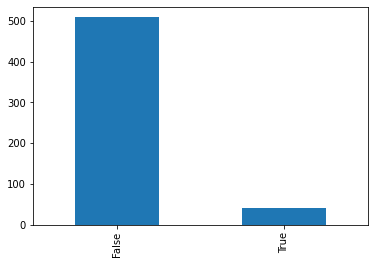

In [24]:
df['title'].str.contains("Χαρδαλιάς").value_counts().plot(kind = "bar")

In [25]:
#Προσπάθεια για split
##df[['First','text']] = df.body.str.split("2021\n" or "2020\n" or "2021 \n"or "2020 \n", expand=True, n=1)

In [26]:
df['body'] = df['body'].str.replace(r'https?:\/\/.*[\r\n]*–'," ")

In [27]:
df['body'] = df['body'].str.replace('\n', " ")

In [28]:
df['body'] = df['body'].str.replace('\xa0', " ")

In [29]:
df['body'] = df['body'].str.replace('000', " ")

In [30]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/PolitikiProstasiaFinalClean07062021.tsv", sep='\t')

In [31]:
df['body'][400]

'Αθήνα, 26 Ιουνίου 2020 Η Γενική Γραμματεία Πολιτικής Προστασίας προχώρησε στην έκδοση 9 Οδηγιών για τη λήψη των απαραίτητων μέτρων προστασίας από τη νόσο COVID-19, με δεδομένο ότι από 1η Ιουλίου “ανοίγουν” 41 πύλες εισόδου στη χώρα (27 αεροδρόμια, 7 χερσαία σημεία εισόδου και 7 λιμάνια). Κεντρικό μήνυμα της νέας αυτής προσπάθειας είναι: Απολαύστε τη Διαμονή σας – Μείνετε Ασφαλείς «Enjoy your stay and stay safe».  Σκοπός της ενημερωτικής καμπάνιας, η οποία βρίσκεται σε απόλυτη συνάρτηση με τη βάση πληροφοριών και ενημέρωσης του Υπουργείου Υγείας και του Παγκόσμιου Οργανισμού Υγείας, είναι η παροχή έγκυρης ενημέρωσης, ώστε το άνοιγμα του ελληνικού τουρισμού να γίνει με όρους ασφάλειας για όλους, επισκέπτες και μόνιμους κατοίκους στη χώρα μας. Σημειώνεται ότι σε όλες τις πύλες εισόδου θα υπάρχει σχετική σήμανση με οδηγίες, ενώ θα μοιράζεται και έντυπο ενημερωτικό υλικό. Η καμπάνια, η οποία πραγματοποιήθηκε σε συνεργασία με τον ΕΟΔΥ, την ΥΠΑ, την Fraport και το Διεθνές Αεροδρόμιο Αθηνών «

In [ ]:
#df['title'][(df['title'].str.contains("Χαρδαλιά")) | (df['title'].str.contains("Χαρδαλιάς")) ].value_counts()

In [ ]:
df['title'].str.contains("Χαρδαλιά").value_counts()

False    345
True     204
Name: title, dtype: int64

In [ ]:
df['title'].str.contains('αντιπυρική').value_counts()

False    531
True      18
Name: title, dtype: int64

In [32]:
df_dates= df[df['date'].notna()]

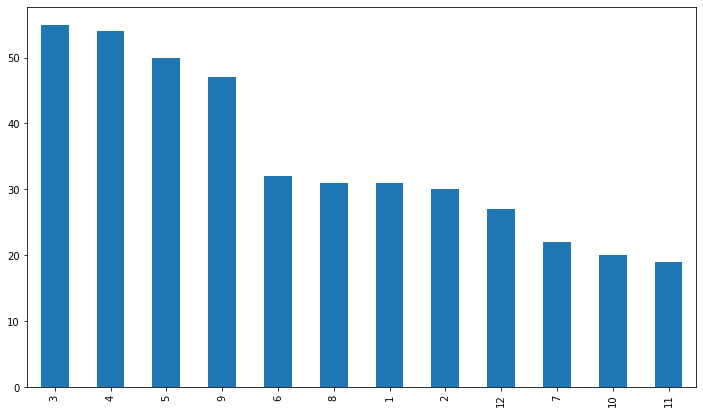

In [39]:
df_dates["month"].value_counts().plot(kind='bar', figsize=(12,7))

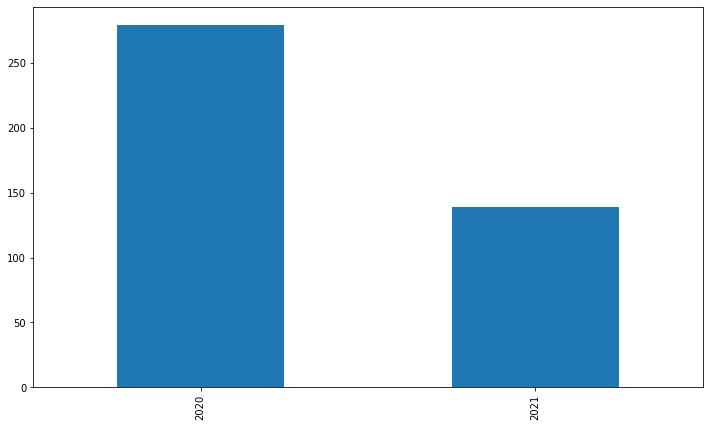

In [38]:
df_dates["year"].value_counts().plot(kind='bar', figsize=(12,7))

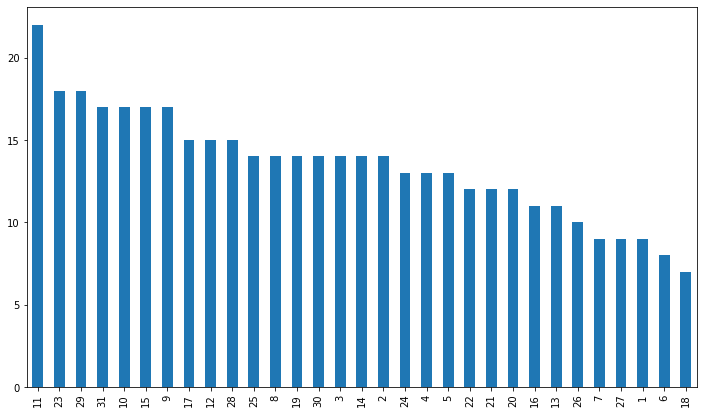

In [37]:
df_dates["day"].value_counts().plot(kind='bar', figsize=(12,7))

In [ ]:
df_covid = df[(df['title'].str.contains("Ενημέρωση")) & (df['title'].str.contains("συντακτών")) ]
df_covid

,title,date,body,url,year,month,day
5,Ενημέρωση διαπιστευμένων συντακτών από τον Υπο...,2021-06-09,"Αθήνα, 09 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Κυρίες και...",https://www.civilprotection.gr/el/simantika-th...,2021,6,9
6,Ενημέρωση συντακτών από Υφυπουργό Πολιτικής Πρ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/enimerosi-sy...,2021,6,11
17,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,2021-06-04,"Αθήνα, 04 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,4
19,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 28 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σα...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
35,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 14 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
...,...,...,...,...,...,...,...
517,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-24,"Αθήνα, 24 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέρα...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,24
520,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-17,"Αθήνα, 17 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέ...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,17
525,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-16,"Αθήνα, 16 Μαρτίου 2020 Νίκος Χαρδαλιάς: “………...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,16
528,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,NaT,"Αθήνα, 19 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέρα...",https://www.civilprotection.gr/el/enimerosi-di...,0,0,0


In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
text = df['body'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
text

Output hidden; open in https://colab.research.google.com to view.

In [41]:
text = df['body'].str.cat(sep = ' ')

In [42]:
text

Output hidden; open in https://colab.research.google.com to view.

In [43]:
import spacy

In [40]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 5.4MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=ea828bace14e1095a543d1833799fea7302e7223d7b728764989651ef003f58c
  Stored in directory: /tmp/pip-ephem-wheel-cache-uvfqc1kb/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [44]:
nlp = spacy.load('el_core_news_sm')

In [59]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
    #max_words =100,
    #mode='RGBA'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Lemmatization

Έκανα stemming στους τίλτους γιατί τα κείμενα του body ήταν πολύ μεγάλα

In [68]:
#df_short = df[df['date'].notna()]
#df_short.shape

In [67]:
#df_short = df[df['year']== 2021]
#df_short.shape

In [66]:
#text2 = df_short['body'][0:100].str.cat(sep = ' ').replace("amp", ' ')

In [61]:
text3 =df['title'].str.cat(sep = ' ').replace("amp", ' ')

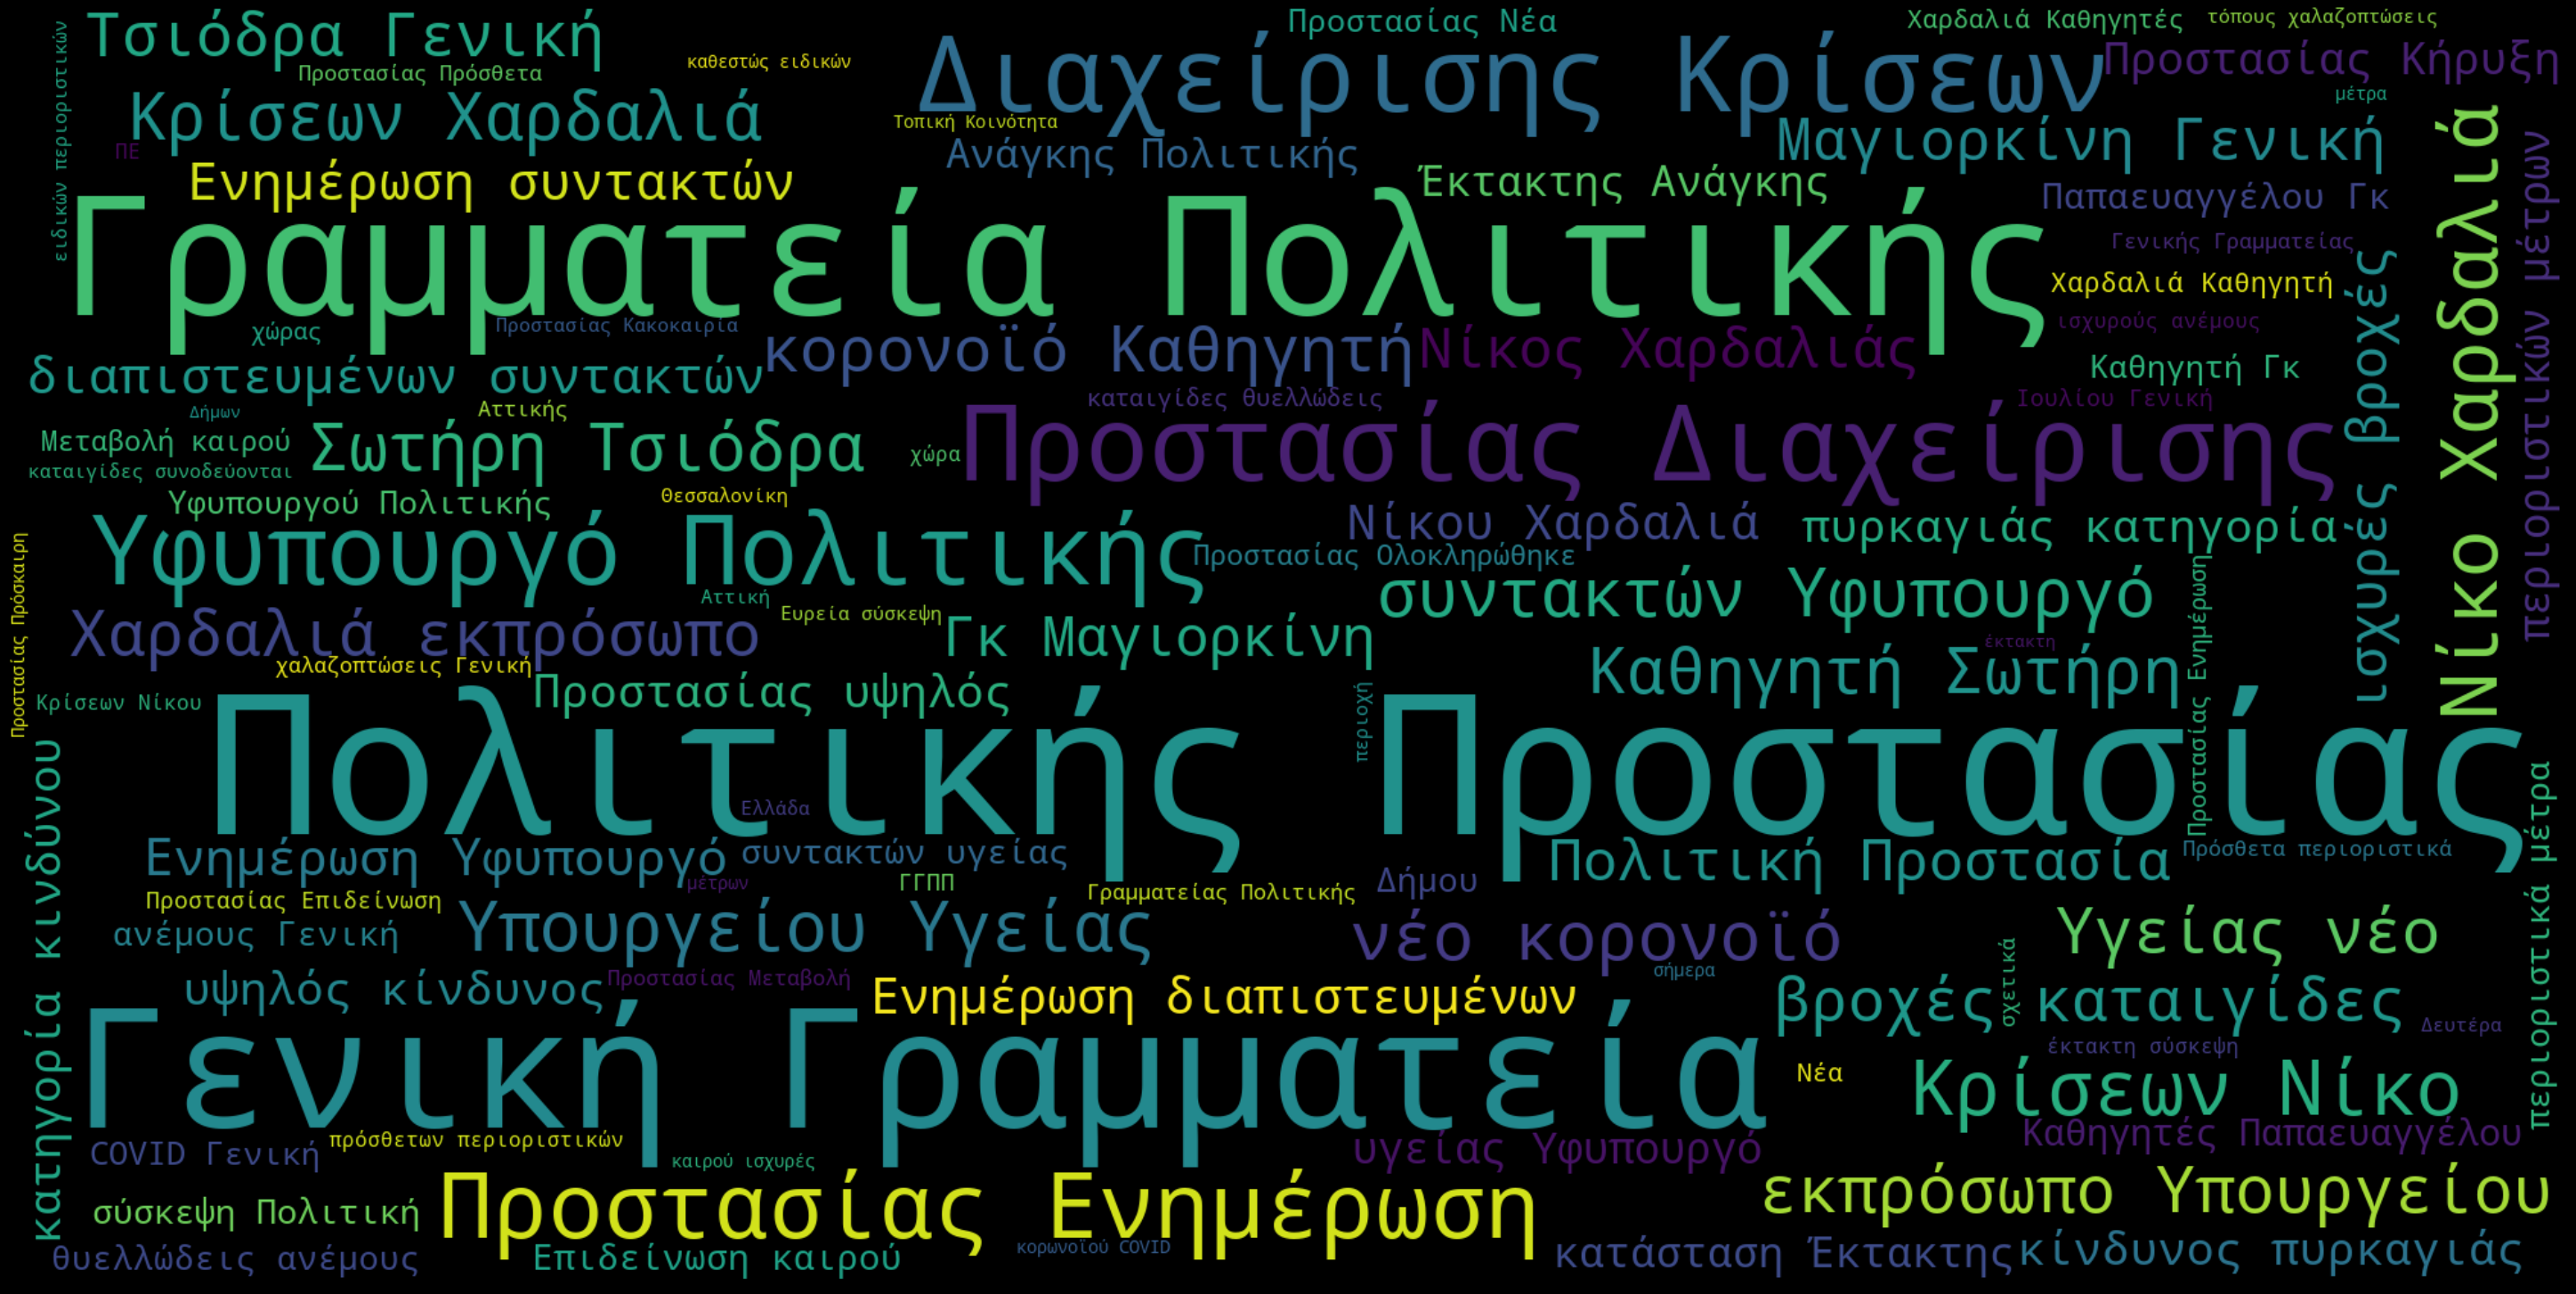

In [71]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    max_words =100
    #mode='RGBA'
).generate(text3)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [63]:
full_doc = nlp(text3)

In [72]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [73]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Vectorization

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [75]:
count_vector = cv.fit_transform(df['body'])

In [76]:
count_vector.shape

(549, 27662)

In [ ]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,000,000τ,001,004,005,006,007,008,009,00π,01,010,013,015,016,017,018,019,02,020,022,023,026,03,030,031,032,033,034,035,036,038,04,040,042,043,044,046,047,...,ύλης,ύπαιθρο,ύπαρξη,ύπαρξης,ύπατο,ύπνο,ύπνος,ύποπτα,ύποπτες,ύποπτη,ύποπτο,ύποπτου,ύποπτους,ύποπτων,ύπουλη,ύπουλο,ύπουλος,ύστατη,ύστατο,ύστερα,ύφανσης,ύφασμα,ύφεση,ύφεσης,ύφος,ύψιστη,ύψιστης,ύψιστο,ύψος,ύψους,ύψωμα,ώρα,ώρας,ώρες,ώριμη,ώσεις,ώση,ώσης,ώσπου,ώστε
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,7,0,3,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.1, max_df=0.95)

In [78]:
count_vector = cv.fit_transform(df['body'])

In [79]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,05,06,08,09,10,100,11,12,13,14,15,16,17,18,19,20,200,2020,2021,21,22,23,24,25,26,27,28,29,30,300,31,40,50,500,65,70,astynomia,civilprotection,covid,...,υφυπουργού,υφυπουργό,υφυπουργός,φάρμακα,φάση,φαίνεται,φαινομένων,φαινόμενα,φεβρουαρίου,φορά,φορές,φορέων,φορείς,φορτίο,φορτίου,φραγμένα,φροντίδας,φυσικά,χάρτη,χαρακτηριστικά,χαρδαλιά,χαρδαλιάς,χαρδαλιας,χειμάρρους,χθες,χρήση,χρειάζεται,χρειαστεί,χρονικό,χρόνια,χρόνο,χώρα,χώρας,χώρες,χώρο,χώρους,όριο,όχημα,ώρα,ώρες
0,0,0,4,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,6,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,3,0,0,1,0,4
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,4,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,1,0,0,1,0,1,0,2,1,1,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,1,1,3,0,2,3,2,4,0,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,3,2,0,1,0,0,0,...,0,2,2,0,0,1,0,0,0,4,1,4,5,1,0,0,0,0,0,3,4,3,9,0,0,2,3,0,3,8,7,11,3,0,0,0,0,0,7,3
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [81]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,,,,,,,-και,01-09-2020,05:00,06.00,06:00,07.00,07:00,08:00,"1,5",1.200,1.300,1.400,1.500,1.600,1.700,1/3,10%,10-15,10.,100,100%,100%.,101,102,103,105,107,11.,110,112,113,114,115,...,ψυχαγωγικός,ψυχικός,ψυχοκοινωνικός,ψυχολογικός,ψυχομετρικός,ψυχραιμία,ωράριο,ωραρίο,ωρωπός,ωρός,ωφελούμενος,όγκο,όγκος,όμορους,όντως,όπλο,όποι,όρί,όργανο,όριο,όρο,όρος,όρου,όρους,όφελο,όχημά,όχημα,όψει,όψιν,ύλη,ύπαιθρο,ύπαρξη,ύποπτα,ύποπτος,ύφεση,ύψο,ύψου,ώρα,ώρες,ώρος
0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,6,3,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=16, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,αφορώ,γενικός,ημέρα,θέλω,κάνω,κρούσματας,μέτρο,μπορώ,νέος,περιοχή,πολιτικός,προστασία,σήμερα,υγεία,υπάρχω,χώρα
0,0,3,0,0,0,0,1,6,0,4,4,5,3,0,0,2
1,1,3,0,1,0,0,0,1,0,4,6,6,0,0,4,0
2,1,3,0,0,0,0,0,0,1,6,6,7,0,0,0,1
3,16,4,0,18,13,0,5,22,9,22,17,21,6,0,16,14
4,0,0,0,0,1,0,0,0,2,0,3,3,0,0,0,0


In [94]:
results.sum(axis =0).sort_values(ascending = False)

μέτρο         2720
προστασία     2664
χώρα          2021
πολιτικός     1982
υγεία         1902
περιοχή       1701
υπάρχω        1612
μπορώ         1562
σήμερα        1370
νέος          1330
κάνω          1206
ημέρα         1203
αφορώ         1156
κρούσματας    1111
θέλω          1099
γενικός       1011
dtype: int64

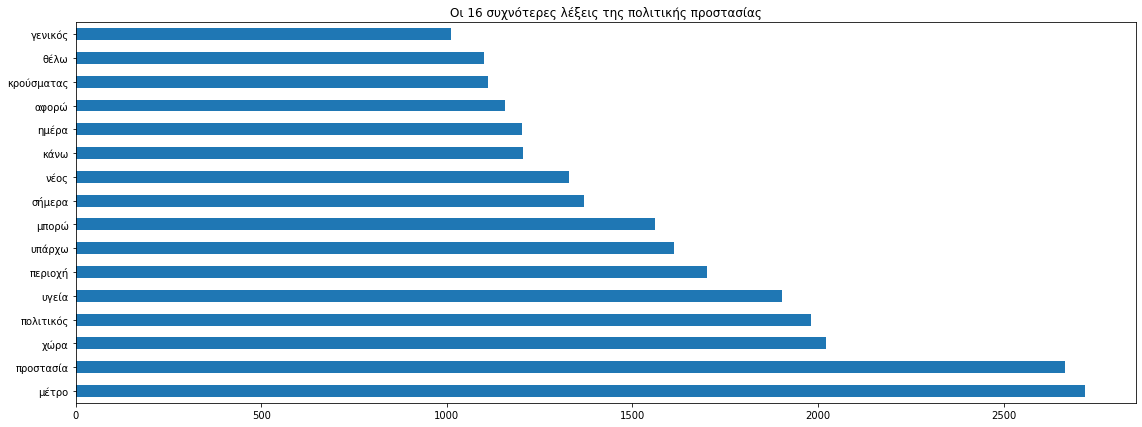

In [95]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,7), title="Οι 16 συχνότερες λέξεις της πολιτικής προστασίας")

In [85]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=16)#, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,2020,αφορά,επίπεδο,κρουσμάτων,κρούσματα,μέτρα,μέτρων,περιοχές,πολιτικής,προστασίας,σήμερα,στιγμή,τεστ,υγείας,υπάρχει,χώρα
0,0,0,0,0,0,0,1,4,4,5,3,0,0,0,0,1
1,0,1,0,0,0,0,0,2,5,5,0,0,0,0,4,0
2,0,1,0,0,0,0,0,4,6,7,0,0,0,0,0,0
3,3,16,4,0,0,3,1,19,12,13,6,13,0,0,7,11
4,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0


In [86]:
results.sum(axis =0).sort_values(ascending = False)

προστασίας    2201
υγείας        1679
πολιτικής     1672
μέτρα         1497
σήμερα        1370
κρούσματα     1113
υπάρχει       1045
περιοχές      1007
χώρα           985
μέτρων         937
2020           913
κρουσμάτων     867
επίπεδο        841
στιγμή         814
αφορά          806
τεστ           776
dtype: int64

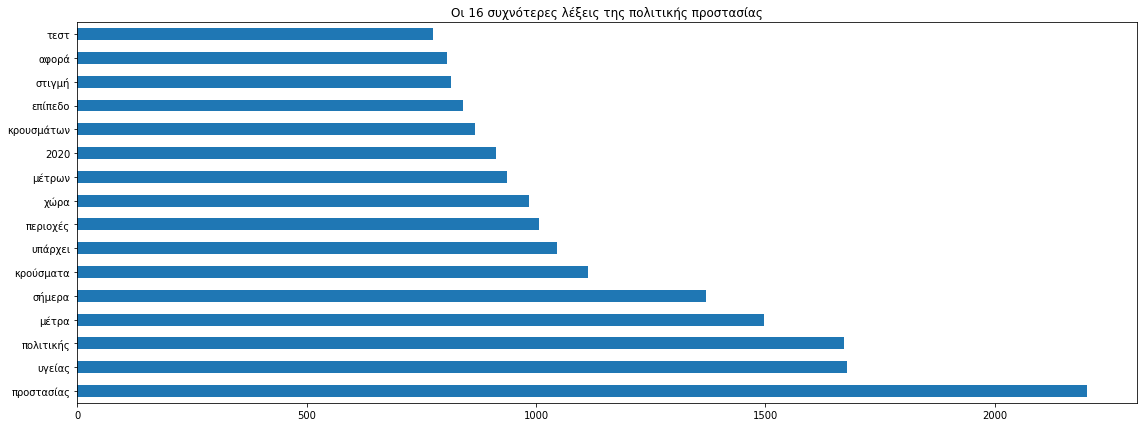

In [90]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,7), title="Οι 16 συχνότερες λέξεις της πολιτικής προστασίας")

In [96]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=16, ngram_range=(2, 2), tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,γενικός γραμματέας,γενικός γραμματεία,γραμματεία πολιτικός,δημόσιας υγεία,διαχείρισης κρίσεα,εκδήλωση έντονος,ενεργά κρούσματας,εντατικός θεραπεία,καιρικός φαινομένο,περιφερειακός ενότητα,πολιτικός προστασία,προστασία διαχείρισης,σύστημα υγεία,υπουργείο υγεία,υφυπουργός πολιτικός,χρήση μάσκα
0,0,3,3,0,0,4,0,0,5,0,4,0,0,0,0,0
1,0,2,2,0,1,0,0,0,0,0,6,1,0,0,1,0
2,2,1,1,0,1,0,0,0,0,0,6,1,0,0,0,0
3,1,1,1,0,2,0,0,0,0,0,16,2,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0


In [97]:
results.sum(axis =0).sort_values(ascending = False)

πολιτικός προστασία      1920
περιφερειακός ενότητα     582
γενικός γραμματεία        555
γραμματεία πολιτικός      516
δημόσιας υγεία            343
διαχείρισης κρίσεα        337
χρήση μάσκα               332
σύστημα υγεία             332
προστασία διαχείρισης     320
υπουργείο υγεία           313
καιρικός φαινομένο        298
ενεργά κρούσματας         277
γενικός γραμματέας        264
υφυπουργός πολιτικός      255
εντατικός θεραπεία        236
εκδήλωση έντονος          233
dtype: int64

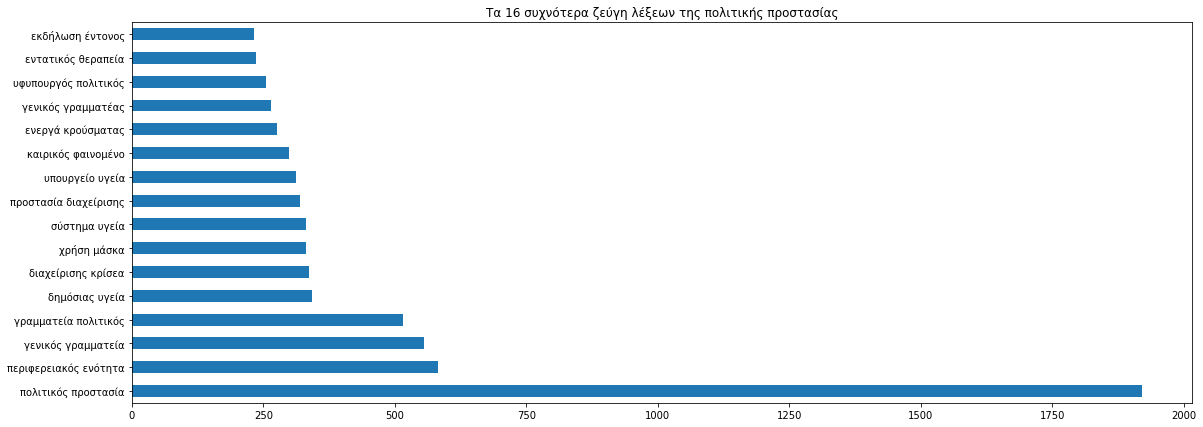

In [98]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,7), title="Τα 16 συχνότερα ζεύγη λέξεων της πολιτικής προστασίας")

In [99]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=16, ngram_range=(2, 2))#, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,covid 19,γενική γραμματεία,γενικής γραμματείας,γραμματεία πολιτικής,δημόσιας υγείας,διαχείρισης κρίσεων,ενεργά κρούσματα,εντατικής θεραπείας,καιρικών φαινομένων,περιφερειακή ενότητα,περιφερειακής ενότητας,πολιτική προστασία,πολιτικής προστασίας,προστασίας διαχείρισης,σύστημα υγείας,χρήση μάσκας
0,0,2,1,2,0,0,0,0,5,0,0,0,4,0,0,0
1,0,0,2,0,0,2,0,0,0,0,0,1,5,1,0,0
2,0,1,0,1,0,1,0,0,0,0,0,0,6,1,0,0
3,0,0,1,0,0,2,0,0,0,0,0,6,10,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0


In [100]:
results.sum(axis =0).sort_values(ascending = False)

πολιτικής προστασίας      1646
διαχείρισης κρίσεων        369
δημόσιας υγείας            344
προστασίας διαχείρισης     333
σύστημα υγείας             332
γενική γραμματεία          326
covid 19                   321
χρήση μάσκας               317
γραμματεία πολιτικής       300
καιρικών φαινομένων        296
περιφερειακής ενότητας     287
περιφερειακή ενότητα       286
ενεργά κρούσματα           277
πολιτική προστασία         273
εντατικής θεραπείας        230
γενικής γραμματείας        228
dtype: int64

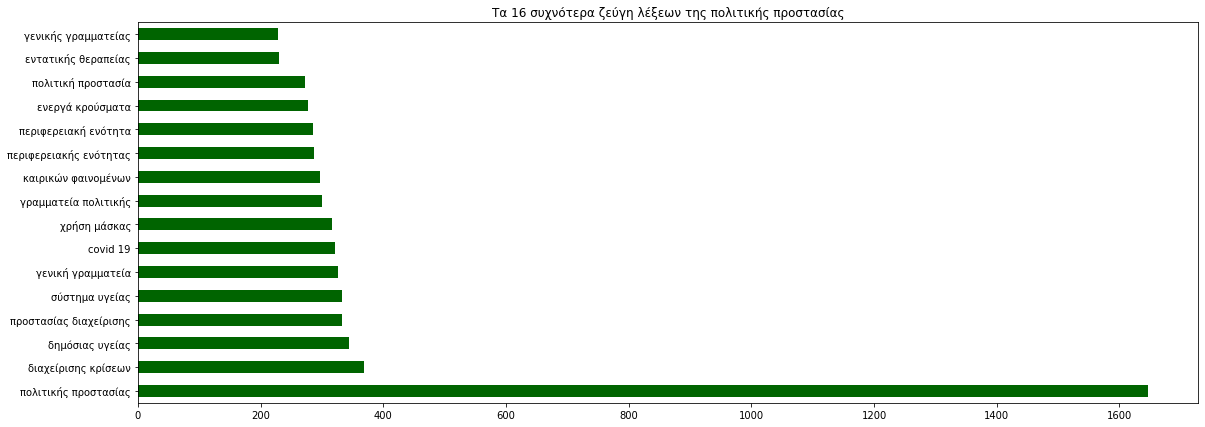

In [102]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,7), color= "DarkGreen", title="Τα 16 συχνότερα ζεύγη λέξεων της πολιτικής προστασίας")

In [88]:
#sum_words =  results.sum(axis =0)
#sum_words.sort_values(ascending = False).head()  

In [110]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αντιπυρική', 'καραντίνα','lockdown','ώρα','εμβόλιο','εμβολιασμός']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,αντιπυρική,καραντίνα,lockdown,ώρα,εμβόλιο,εμβολιασμός
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0


In [111]:
results.sum(axis =0).sort_values(ascending = False)

καραντίνα      14
αντιπυρική     10
lockdown        2
εμβολιασμός     0
εμβόλιο         0
ώρα             0
dtype: int64

In [119]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αντιπυρική'])#, 'καραντίνα','lockdown','ώρα','εμβόλιο','εμβολιασμός']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,αντιπυρική
0,0
1,3
2,0
3,8
4,1


In [120]:
results.sum(axis =0).sort_values(ascending = False)

αντιπυρική    38
dtype: int64

In [117]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bπυρ[α-ωά-ώ][α-ωά-ώ]*\\b')#'\\bεμβ[α-ωά-ώ]λ[α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,πυρά,πυρκαγιά,πυρκαγιάς,πυρκαγιές,πυροπροστασίας,πυρος,πυροσβέστες,πυροσβεστικού,πυροσβεστικό,πυροσβεστικών
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [118]:
results.sum(axis =0).sort_values(ascending = False)

πυρκαγιάς         31
πυροσβεστικού      3
πυροπροστασίας     3
πυρκαγιές          3
πυρκαγιά           3
πυροσβεστικών      1
πυροσβεστικό       1
πυροσβέστες        1
πυρος              1
πυρά               1
dtype: int64

In [151]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bεμβ[α-ωά-ώ]λ[α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,εμβολιαστικά,εμβολιαστικό
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [152]:
results.sum(axis =0).sort_values(ascending = False)

εμβολιαστικό    6
εμβολιαστικά    2
dtype: int64

In [128]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bβρο[α-ωά-ώ][α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,βροχές,βροχοπτώσεις
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [129]:
results.sum(axis =0).sort_values(ascending = False)

βροχές          48
βροχοπτώσεις     2
dtype: int64

In [133]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bχι[α-ωά-ώ][α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,χιονιού,χιονοπτώσεις,χιονοπτώσεων
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [131]:
results.sum(axis =0).sort_values(ascending = False)

χιονοπτώσεις    12
χιονοπτώσεων     2
χιονιού          1
dtype: int64

In [134]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκαιρ[α-ωά-ώ][α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,καιρικά,καιρικό,καιρικών,καιρού
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [135]:
results.sum(axis =0).sort_values(ascending = False)

καιρού      42
καιρικών     4
καιρικά      2
καιρικό      1
dtype: int64

In [201]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern='\\bανέ[α-ωά-ώ][α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,ανέμους
0,0
1,0
2,0
3,0
4,0


In [202]:
results.sum(axis =0).sort_values(ascending = False)

ανέμους    35
dtype: int64

In [136]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b')#, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κορονοϊού,κορονοϊό,κορωνοιού,κορωνοϊού,κορωνοϊό
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [137]:
results.sum(axis =0).sort_values(ascending = False)

κορονοϊό     55
κορωνοϊού    12
κορωνοϊό      8
κορονοϊού     3
κορωνοιού     1
dtype: int64

In [139]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bcov[a-z0-9-_]*\\b')#, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,covid-19,covid19,covid_19
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [140]:
results.sum(axis =0).sort_values(ascending = False)

covid-19    19
covid_19     2
covid19      1
dtype: int64

In [149]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ][α-ωά-ώ]*\\b')#, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['title'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κυβέρνησης,κυβερνητικού
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [150]:
results.sum(axis =0).sort_values(ascending = False)

κυβερνητικού    2
κυβέρνησης      1
dtype: int64

In [153]:
 cv = CountVectorizer(vocabulary = ['χαρδαλιά','τσιόδρα','κικίλια','μαγιορκίνη','κεραμέως','παπαευαγγέλου']) #['ΧΑΡΔΑΛΙΑ', 'Τσιόδρα','ΜΑΓΙΟΡΚΙΝΗ','Παπαευαγγέλου','Κεραμέως','Κικίλια'])
 count_vector = cv.fit_transform(df['title'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,χαρδαλιά,τσιόδρα,κικίλια,μαγιορκίνη,κεραμέως,παπαευαγγέλου
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [154]:
results.sum(axis =0).sort_values(ascending = False)

χαρδαλιά         164
τσιόδρα           51
μαγιορκίνη        49
παπαευαγγέλου     31
κικίλια            7
κεραμέως           3
dtype: int64

In [157]:
 cv = CountVectorizer(vocabulary = ['επιδείνωση','ακραία', 'άνεμοι','κακοκαιρία', 'έκτακτη']) #['ΧΑΡΔΑΛΙΑ', 'Τσιόδρα','ΜΑΓΙΟΡΚΙΝΗ','Παπαευαγγέλου','Κεραμέως','Κικίλια'])
 count_vector = cv.fit_transform(df['title'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,επιδείνωση,ακραία,άνεμοι,κακοκαιρία,έκτακτη
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [158]:
results.sum(axis =0).sort_values(ascending = False)

επιδείνωση    21
έκτακτη       19
κακοκαιρία    12
άνεμοι         1
ακραία         0
dtype: int64

In [175]:
 cv = CountVectorizer(token_pattern = '\\bυπουρ[α-ωά-ώ][α-ωά-ώ]*\\b') #ngram_range=(2, 2))
 count_vector = cv.fit_transform(df['title'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,υπουργείο,υπουργείου,υπουργού,υπουργό
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [176]:
results.sum(axis =0).sort_values(ascending = False)

υπουργείου    59
υπουργό       14
υπουργού       3
υπουργείο      2
dtype: int64

In [177]:
 cv = CountVectorizer(token_pattern = '\\bγραμματ[α-ωά-ώ][α-ωά-ώ]*\\b') #ngram_range=(2, 2))
 count_vector = cv.fit_transform(df['title'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,γραμματέα,γραμματέας,γραμματεία,γραμματείας,γραμματικό,γραμματοσήμων
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [178]:
results.sum(axis =0).sort_values(ascending = False)

γραμματεία       555
γραμματείας       12
γραμματέας         4
γραμματέα          3
γραμματοσήμων      2
γραμματικό         1
dtype: int64

# Sentiment analysis

In [291]:
df_dates = df[df['date'].notna()]
df_dates.shape

(418, 7)

In [292]:
df_dates =df[df['year']==2021]

In [293]:
df_dates.sort_values(by='date')

,title,date,body,url,year,month,day
168,Επιδείνωση του καιρού με ισχυρές βροχές και κα...,2021-01-03,"Αθήνα, 03 Ιανουαρίου 2021 Σύμφωνα με το Έκτακτ...",https://www.civilprotection.gr/el/epideinosi-t...,2021,1,3
99,Ισχυρή σεισμική δόνηση στην Ελασσόνα – Σε πλήρ...,2021-01-03,"Αθήνα, 03 Ιανουαρίου 2021 Ισχυρή σεισμική δόνη...",https://www.civilprotection.gr/el/simantika-th...,2021,1,3
165,Κήρυξη της Κοινότητας Καρίτσης Δολόπων του Δήμ...,2021-01-04,"Αθήνα, 04 Ιανουαρίου 2021 Με εντολή του Υφυπου...",https://www.civilprotection.gr/el/kiryxi-tis-k...,2021,1,4
156,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,2021-01-08,"Αθήνα, 8 Ιανουαρίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρ...",https://www.civilprotection.gr/el/enimerosi-sy...,2021,1,8
155,Πρόσθετα περιοριστικά μέτρα στην Τοπική Κοινότ...,2021-01-08,"Αθήνα, 08 Ιανουαρίου 2021 Μετά από έκτακτη σ...",https://www.civilprotection.gr/el/prostheta-pe...,2021,1,8
...,...,...,...,...,...,...,...
2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 Ξεκινά τη Δευτέρα η Επι...",https://www.civilprotection.gr/el/simantika-th...,2021,6,11
0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 Σύμφωνα με το Έκτακτο Δ...",https://www.civilprotection.gr/el/ishyres-vroh...,2021,6,11
1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021 Ολοκληρώθηκε η επίσκεψη...",https://www.civilprotection.gr/el/simantika-th...,2021,6,12
9,Στο Τατόι σήμερα ο Νίκος Χαρδαλιάς – Προχωρούν...,2021-06-14,"Αθήνα, 14 Ιουνίου 2021 Στο Τατόι μετέβη σήμερα...",https://www.civilprotection.gr/el/simantika-th...,2021,6,14


In [295]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [297]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [298]:
matrix = vec.fit_transform(df_dates['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [299]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [300]:
df_dates['anger'] = wordcount_df[angry_words].sum(axis=1)

df_dates['positivity'] = wordcount_df[positive_words].sum(axis=1)


df_dates['joy'] = wordcount_df[joy_words].sum(axis=1)

df_dates['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df_dates['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df_dates['trust'] = wordcount_df[trust_words].sum(axis=1)


df_dates['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df_dates['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df_dates['negative'] = wordcount_df[negative_words].sum(axis=1)

df_dates['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [301]:
df_dates.set_index('date' , inplace=True)

In [302]:
df_dates.shape

(139, 16)

In [303]:
df_dates.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [304]:
df_dates.shape

(121, 16)

In [311]:
df_dates[df_dates['month']==5]

,title,body,url,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,,,,,
2021-05-28,Στην Κέρκυρα μεταβαίνει ο Νίκος Χαρδαλιάς – Έτ...,"Αθήνα, 28 Μαΐου 2021 Στην Κέρκυρα θα μεταβε...",https://www.civilprotection.gr/el/stin-kerkyra...,2021,5,28,2.0,11.0,5.0,5.0,3.0,6.0,8.0,4.0,6.0,4.0
2021-05-29,Στο νέο εμβολιαστικό κέντρο της Πολιτικής Προσ...,"Αθήνα, 29 Μαΐου 2021 Στην Κέρκυρα μετέβη σήμερ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,29,3.0,9.0,2.0,1.0,1.0,5.0,5.0,3.0,5.0,4.0
2021-05-22,Έτοιμο το νέο mega εμβολιαστικό κέντρο της Πολ...,"Αθήνα, 22 Μαΐου 2021 Σε πλήρη ετοιμότητα βρίσκ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,22,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2021-05-27,Σε πλήρη εγρήγορση η Πολιτική Προστασία και η ...,"Αθήνα, 27 Μαΐου 2021 Συνάντηση με τον Περιφερε...",https://www.civilprotection.gr/el/simantika-th...,2021,5,27,1.0,5.0,0.0,1.0,0.0,5.0,1.0,2.0,4.0,1.0
2021-05-22,Αίρονται τα ειδικά περιοριστικά μέτρα στην Κάλ...,"Αθήνα, 22 Μαΐου 2021 Λαμβάνοντας υπόψη τα βελτ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,22,3.0,13.0,4.0,4.0,3.0,6.0,11.0,2.0,7.0,3.0
2021-05-21,Έκτακτη ενημέρωση Νίκου Χαρδαλιά για την εξέλι...,"Αθήνα, 21 Μαΐου 2021 Έκτακτη ενημέρωση πραγ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,21,0.0,4.0,1.0,1.0,0.0,5.0,2.0,1.0,1.0,2.0
2021-05-20,ΝΕΑ ΕΝΕΡΓΟΠΟΙΗΣΗ 112 / ΑΜΕΣΗ ΑΠΟΜΑΚΡΥΝΣΗ ΠΟΛΙΤ...,"Αθήνα, 20 Μαΐου 2021 Σε συνέχεια προηγούμενου ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,20,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2021-05-25,Επίσκεψη κυβερνητικού κλιμακίου στο Τατόι – Σε...,"Αθήνα, 25 Μαΐου 2021 Στο Τατόι μετέβη σήμερα κ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,25,11.0,38.0,8.0,14.0,6.0,26.0,12.0,14.0,36.0,18.0
2021-05-27,Πρόσκαιρη μεταβολή του καιρού στη βόρεια Ελλάδ...,"Αθήνα, 27 Μαΐου 2021 Σύμφωνα με το Έκτακτο Δελ...",https://www.civilprotection.gr/el/simantika-th...,2021,5,27,6.0,18.0,5.0,0.0,0.0,17.0,1.0,1.0,6.0,5.0


In [242]:
df_dates['body'].str.len().groupby(by=df_dates.index.month).mean()

date
1     7761.888889
2     9416.583333
3     9040.240000
4    10539.857143
5     2773.785714
6    10532.857143
Name: body, dtype: float64

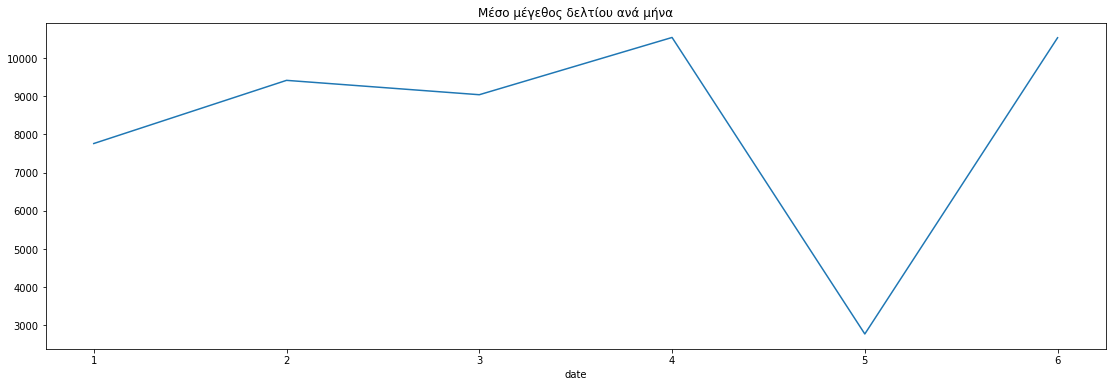

In [243]:
df_dates['body'].str.len().groupby(by=df_dates.index.month).mean().plot(figsize=(19,6),title="Μέσο μέγεθος δελτίου ανά μήνα") 

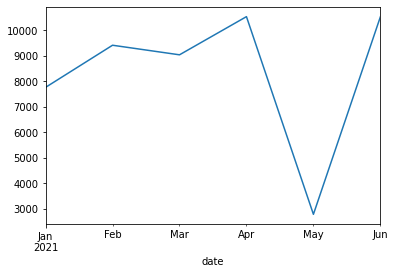

In [244]:
df_dates['body'].str.len().resample('M').mean().plot()

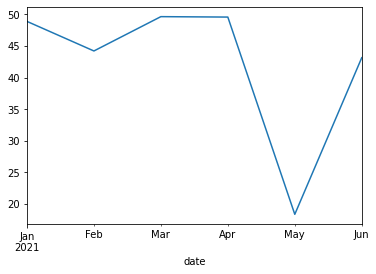

In [245]:
df_dates['positivity'].resample('M').mean().plot() 

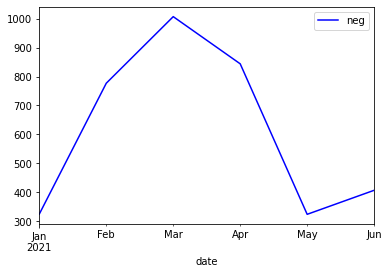

In [246]:
df_dates['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend() 

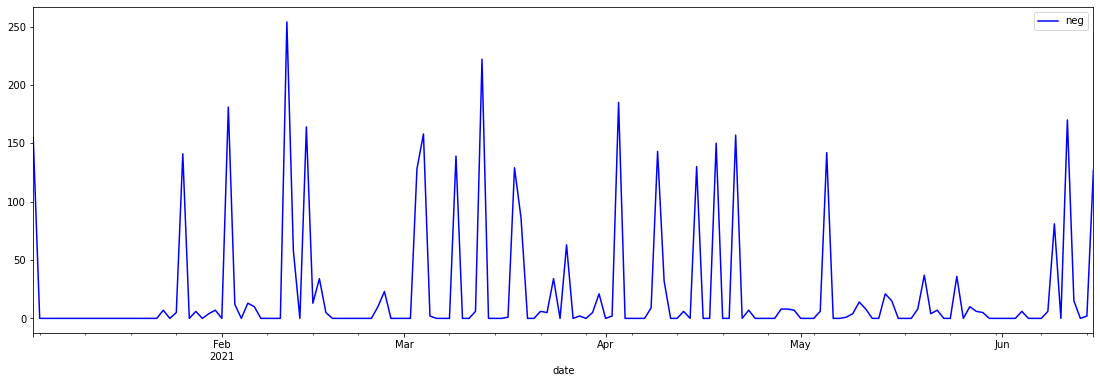

In [247]:
df_dates['negative'].resample('D').sum().plot(figsize=(19,6), color = 'b',label = 'neg').legend() 

Text(0.5, 1.0, 'Σύγκριση συναισθήματος θυμού και χαράς')

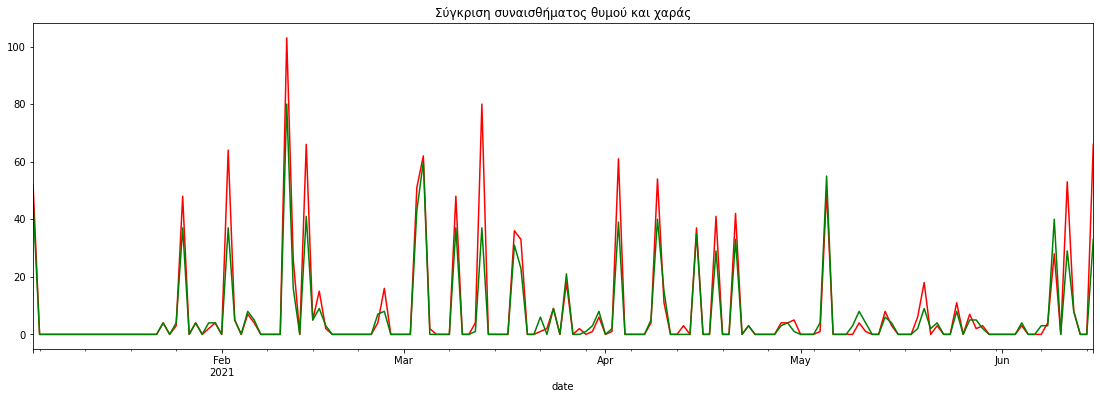

In [312]:
ax = df_dates['anger'].resample('D').sum().plot(figsize=(19,6), color = 'red')
df_dates['joy'].resample('D').sum().plot(figsize=(19,6), ax = ax, color = 'green')
plt.title('Σύγκριση συναισθήματος θυμού και χαράς')

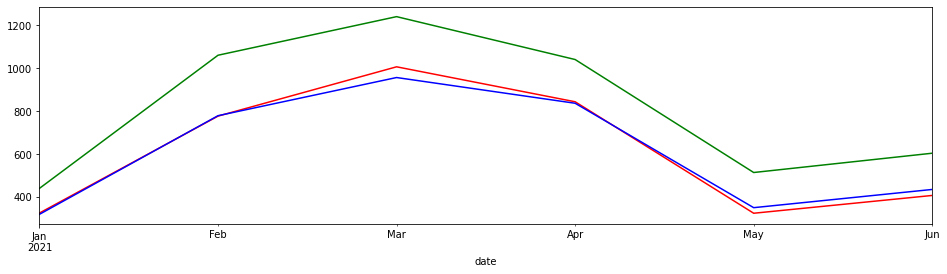

In [249]:
ax = df_dates['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green')
df_dates['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'red')
df_dates['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
#df_dates['anger'].resample('H').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0.5, 1.0, 'Η θετικότητα, η αρνητικότητα και το αίσθημα εμπιστοσύνης των tweets')

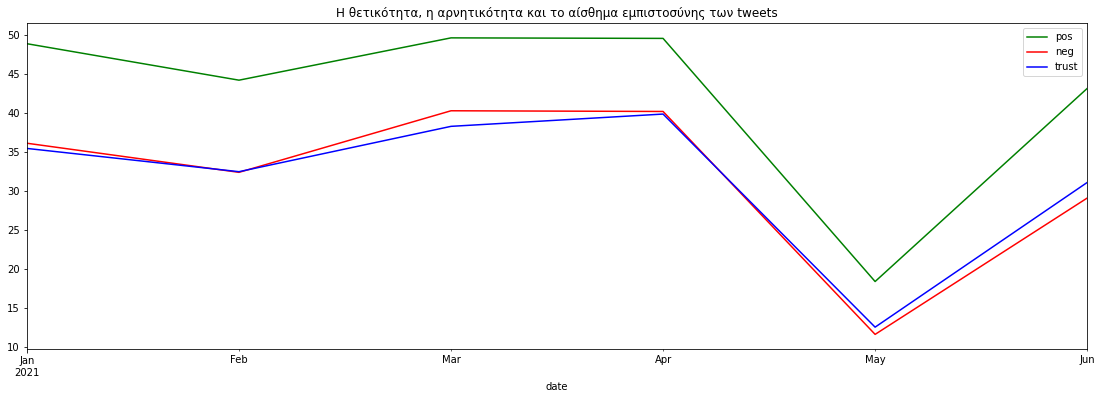

In [250]:
ax = df_dates['positivity'].resample('M').mean().plot(figsize=(19,6), 
                                                          color = 'g', label='pos')
df_dates['negative'].resample('M').mean().plot(figsize=(19,6), ax = ax, 
                                                   label = 'neg', color = 'r')
df_dates['trust'].resample('M').mean().plot(figsize=(19,6), ax = ax, 
                                                label = 'trust',color = 'blue').legend()
plt.title('Η θετικότητα, η αρνητικότητα και το αίσθημα εμπιστοσύνης των tweets') 

# 2020

In [313]:
df_2020 =df[df['year']==2020]

In [314]:
matrix = vec.fit_transform(df_2020['title'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [315]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [316]:
df_2020['anger'] = wordcount_df[angry_words].sum(axis=1)

df_2020['positivity'] = wordcount_df[positive_words].sum(axis=1)


df_2020['joy'] = wordcount_df[joy_words].sum(axis=1)

df_2020['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df_2020['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df_2020['trust'] = wordcount_df[trust_words].sum(axis=1)


df_2020['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df_2020['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df_2020['negative'] = wordcount_df[negative_words].sum(axis=1)

df_2020['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [317]:
df_2020.shape

(279, 17)

In [323]:
df_2020['body'].iloc[200]

'Αθήνα, 19 Μαΐου 2020 Σύμφωνα με το Έκτακτο Δελτίο Επιδείνωσης Καιρού που εκδόθηκε σήμερα Τρίτη 19 Μαΐου 2020 από την Εθνική Μετεωρολογική Υπηρεσία (ΕΜΥ), μεταβολή του καιρού προβλέπεται την Πέμπτη (21-05-2020) από τα δυτικά και βόρεια, με βροχές και καταιγίδες κατά τόπους ισχυρές, που θα συνοδεύονται από χαλαζοπτώσεις και πρόσκαιρα ισχυρούς ανέμους, καθώς και αισθητή πτώση της θερμοκρασίας. Πιο αναλυτικά: Την Πέμπτη (21-05-2020) βροχές και βαθμιαία καταιγίδες θα εκδηλωθούν στη δυτική, κεντρική και βόρεια χώρα, που από τις μεσημβρινές ώρες στη Μακεδονία, την  Ήπειρο, τη Θεσσαλία, τις Σποράδες, τη Στερεά και την Εύβοια θα ενταθούν και θα είναι κατά τόπους ισχυρές. Εξασθένηση των φαινομένων αναμένεται στην Ήπειρο και τη Δυτική Στερεά από νωρίς το βράδυ, ενώ στις υπόλοιπες περιοχές, από τις πρωινές ώρες της Παρασκευής (22-05-2020). Οι πολίτες μπορούν να ενημερώνονται καθημερινά για την εξέλιξη των έκτακτων καιρικών φαινομένων στα τακτικά δελτία καιρού της ΕΜΥ και στην ιστοσελίδα της ΕΜΥ σ

In [272]:
df_2020.set_index('date' , inplace=True)

In [279]:
df_2020.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [280]:
df_2020.shape

(79, 16)

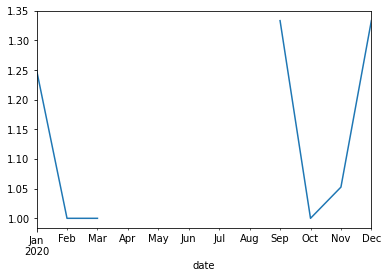

In [281]:
df_2020['positivity'].resample('M').mean().plot() 

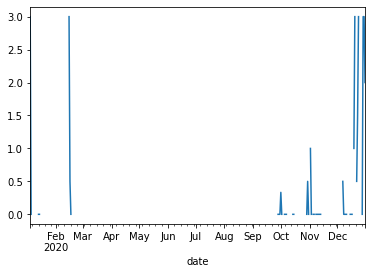

In [282]:
df_2020['negative'].resample('D').mean().plot() 